 為圖像化，僅考慮$ T \in \mathfrak{T} ( \mathbb{R}^{2} , \mathbb{R}^{2})$
 ## 1.原始圖形
 * 圓： 單位圓 
 * 直線： 過(1,0), (0,1)的直線
 * 多邊形 
     * 正方形: 邊長為2 原點為中心 
     * 三角形: 正三角形，外接圓為單位圓、外接圓以原點為中心

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [127]:
#圓
t1 = np.linspace(0, 2*np.pi, 500)
x1 = np.cos(t1)
y1 = np.sin(t1)

#直線
def line(a,b):
    a = np.expand_dims(a, axis=1) #把點的座標換成 (2,1)的形狀
    b = np.expand_dims(b, axis=1)
    t = np.linspace(-10, 10, 100)
    l = a + (b- a)*t
    x, y = l[0], l[1]
    return x,y

p1 = np.array([3,0])
p2 = np.array([0,1])
x2, y2 = line(p1,p2)

#多邊形
def line_segment(a,b):
    a = np.expand_dims(a, axis=1) 
    b = np.expand_dims(b, axis=1)
    t = np.linspace(0, 1, 100) #參數取 [0,1]區間就好
    l = a + (b- a)*t
    x, y = l[0], l[1]
    return x,y

def poly(pts): 
    n = len(pts)               #傳入值 pts 為 list 或 array
    x,y = line_segment(pts[-1], pts[0])
    for i in range(n-1):
        u, v = line_segment(pts[i], pts[i+1])
        x = np.append(x,u)
        y = np.append(y,v)
    return x,y

p1 = np.array([1,1])
p2 = np.array([-1,1])
p3 = np.array([-1,-1])
p4 = np.array([1,-1])
pts = np.array([p1,p2,p3,p4])
x3,y3 = poly(pts)

p1 = np.array([np.cos(np.pi*2/3), np.sin(np.pi*2/3)])
p2 = np.array([np.cos(np.pi*4/3), np.sin(np.pi*4/3)])
p3 = np.array([np.cos(np.pi*2), np.sin(np.pi*2)])
pts = np.array([p1,p2,p3])
x4,y4 = poly(pts)

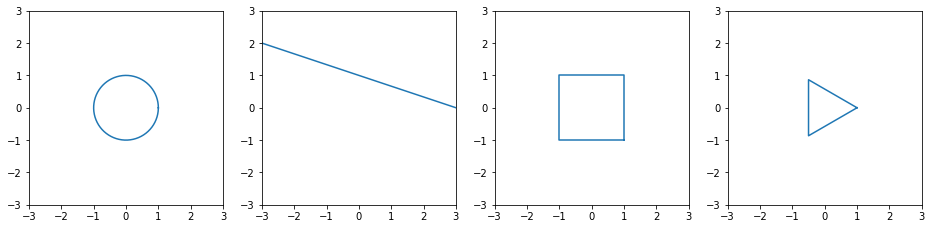

In [128]:
plt.figure(figsize=[16,32])

fg = plt.subplot(141)
ax = plt.gca()
plt.xlim([-3,3])
plt.ylim([-3,3])
fg.plot(x1,y1)
ax.set_aspect('equal')

fg = plt.subplot(142)
ax = plt.gca()
plt.xlim([-3,3])
plt.ylim([-3,3])
fg.plot(x2,y2)
ax.set_aspect('equal')

fg = plt.subplot(143)
ax = plt.gca()
plt.xlim([-3,3])
plt.ylim([-3,3])
fg.plot(x3,y3)
ax.set_aspect('equal')

fg = plt.subplot(144)
ax = plt.gca()
plt.xlim([-3,3])
plt.ylim([-3,3])
fg.plot(x4,y4)
ax.set_aspect('equal')

## 2. 線性轉換
定義 T

並造出T(x1,y1) ....


In [129]:
T = np.matrix([[2, 9],
              [-2, 7]])

def linear_map(T, x, y):
    p = np.array([x,y]) #shpae: 2*500
    new_p = T@p
    new_x = new_p[0]
    new_y = new_p[1]
    new_x = np.array(new_x).squeeze()
    new_y = np.array(new_y).squeeze()
    return new_x, new_y

x1_, y1_ = linear_map(T, x1, y1)
x2_, y2_ = linear_map(T, x2, y2)
x3_, y3_ = linear_map(T, x3, y3)
x4_, y4_ = linear_map(T, x4, y4)

## 3. 最後把它畫出來

In [132]:
k = np.array([[x1, y1], [x2,y2], [x3,y3], [x4,y4],
             [x1_,y1_], [x2_,y2_], [x3_,y3_], [x4_,y4_]])
#k 用於畫圖

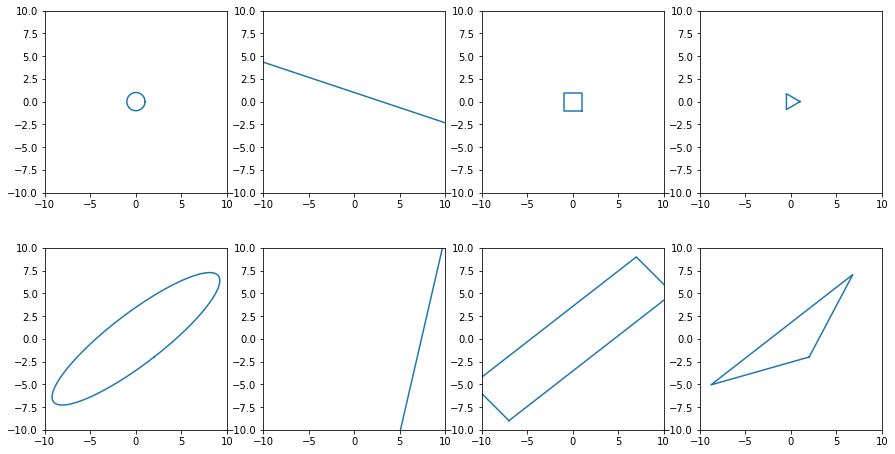

In [134]:
plt.figure(figsize=[15,8])
for i in range(8):
    fg = plt.subplot(2,4,i+1)
    ax = plt.gca()
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    x ,y = k[i]
    fg.plot(x,y)
    ax.set_aspect('equal')